#### Load all the libraries that we'll need

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
% matplotlib inline

#### Load our data

In [88]:
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])
# convert boston.data to a dataframe for use in seaborn
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### And do some EDA

In [89]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [90]:
boston.data.shape

(506, 13)

In [91]:
X.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [92]:
y.describe(include='all')

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [93]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [94]:
y.dtypes

MEDV    float64
dtype: object

In [95]:
X.loc[:, X.isna().any()]
count_nan = len(X) - X.count()
print(count_nan)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [96]:
y.loc[:, y.isna().any()]
count_nan = len(y) - y.count()
print(count_nan)

MEDV    0
dtype: int64


#### Select our feature columns

In [97]:
feature_cols = X[['RM', 'DIS', 'PTRATIO', 'CRIM']]

#### Step 1 - import the class

In [98]:
from sklearn.linear_model import LinearRegression

#### Step 2 - instantiate an instance of the class

In [99]:
lr = LinearRegression()

#### Step 3 - fit and score the model

In [100]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
lr.score(X, y)

0.7406077428649428

#### Step 4 - plot our model

In [102]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [104]:
#import seaborn as sns

#feature_cols.RM.head()
#fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
#feature_cols.plot(kind='scatter', x='RM', y='MEDV', ax=axs[index], figsize=(16, 3))
#for index, feature in enumerate(feature_cols):
#   boston.plot(kind='scatter', x=feature, y=y.MEDV, ax=axs[index], figsize=(16, 3))

#plt.scatter(feature_cols.RM, y.MEDV)
#plt.show
sns.pairplot(bos, x_vars=feature_cols, y_vars='MEDV', kind='reg')

ValueError: Image size of 91080x180 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001F61AB2FB70> (for post_execute):


ValueError: Image size of 91080x180 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 91080x180 pixels is too large. It must be less than 2^16 in each direction.

<function matplotlib.pyplot.show>

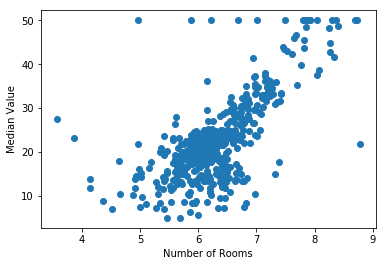

In [42]:
plt.scatter(X.RM, y.MEDV)
plt.xlabel('Number of Rooms')
plt.ylabel('Median Value')
plt.show

<function matplotlib.pyplot.show>

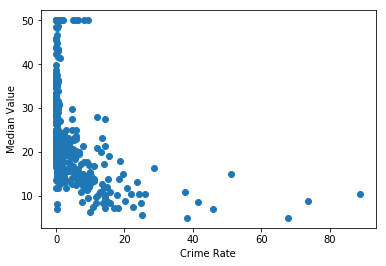

In [43]:
plt.scatter(X.CRIM, y.MEDV)
plt.xlabel('Crime Rate')
plt.ylabel('Median Value')
plt.show

<function matplotlib.pyplot.show>

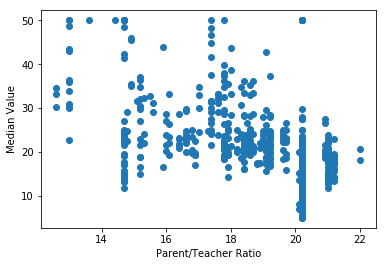

In [44]:
plt.scatter(X.PTRATIO, y.MEDV)
plt.xlabel('Parent/Teacher Ratio')
plt.ylabel('Median Value')
plt.show

<function matplotlib.pyplot.show>

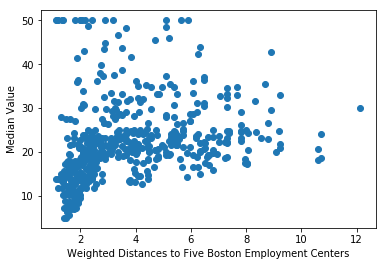

In [106]:
plt.scatter(X.DIS, y.MEDV)
plt.xlabel('Weighted Distances to Five Boston Employment Centers')
plt.ylabel('Median Value')
plt.show

#### Step 1 - instantiate an instance of the class

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#### Step 2 - train/test/split with a ratio of 70% train and 30% test/split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Step 3 - fit the model

In [50]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

#### Step 4 - plot and score the model

Score:  0.7420117182563639


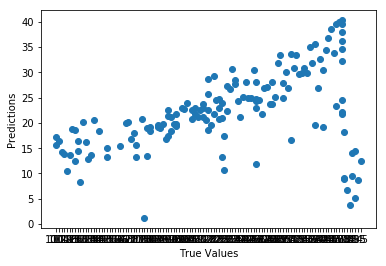

In [52]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print ('Score: ', model.score(X_test, y_test))

#### Step 1 - completed above
#### Step 2 - train/test/split with a ratio of 90% train and 10% test/split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#### Step 3 - fit the model on training data

In [54]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

#### Step 4 - plot and score the model

Score:  0.6931376551117979


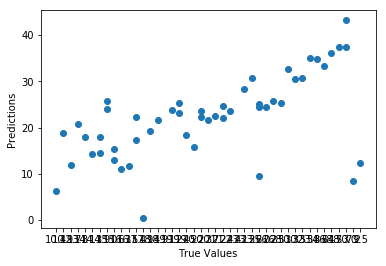

In [55]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print ('Score: ', model.score(X_test, y_test))

#### We see that the score has decreased when the size of the training data increases.  However, looking at the chart, we see more variation with the smaller training set but less variation (outliers) with a larger training set.  This suggests that using more of the training data fits more of the data points, hence lower noticeable variation in the second plot.

#### k-fold cross-validation

In [56]:
# import needed classes
from sklearn import model_selection, metrics

#### Vary folds from 5 to 10 using a loop

In [57]:
# test k=5 through 10 splits
for split_it in range(5,11):
   kf = model_selection.KFold(n_splits=split_it, shuffle=True)

   mse_values = []
   scores = []
   n = 0

   for train_index, test_index in kf.split(X, y):
      lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
      mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
      scores.append(lr.score(X, y))
      n += 1
  

   print('Split : {}'.format(split_it))
   print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
   print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

Split : 5
Mean of MSE for all folds: 24.508867038023073
Mean of R2 for all folds: 0.7370151049802132
Split : 6
Mean of MSE for all folds: 24.137259758846458
Mean of R2 for all folds: 0.7380747254199171
Split : 7
Mean of MSE for all folds: 24.659256685269668
Mean of R2 for all folds: 0.7380137268063163
Split : 8
Mean of MSE for all folds: 23.492171320615782
Mean of R2 for all folds: 0.7393325427939512
Split : 9
Mean of MSE for all folds: 24.3375094820698
Mean of R2 for all folds: 0.7388146667069315
Split : 10
Mean of MSE for all folds: 23.59103525768842
Mean of R2 for all folds: 0.73954007144642


#### Looking at the results and quoting from Wikipedia:
#### "The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better."
#### We see that MSE holds steady between 23.59 to 24.51 as we increase the number of splits.  

#### However, looking at the R^2 value, we see it ranges from .737 to .740 where R^2 shows how close the data fits to the value.  Values closer to 1 indicate that the model explains all the variability of the response data around its mean.

#### It would appear that we increase the number of folds, we see a better R^2 value (goodnes-of-fit i.e. fitting more of the data to the regression line) and slight decrease in MSE.


#### Read the iris data into a DataFrame

In [63]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
iris.shape

(150, 6)

In [64]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [65]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

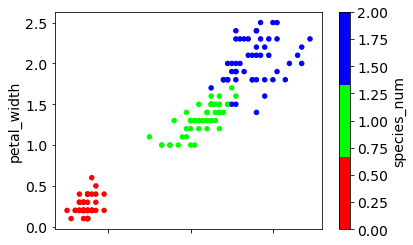

In [66]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)

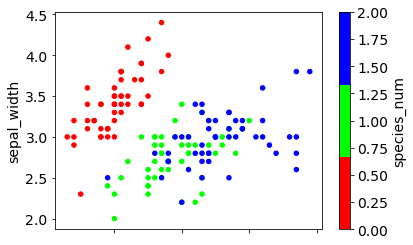

In [67]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

In [68]:
# create our feature columns
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [69]:
# create our response vector
y = iris.species_num

#### Train/test/split

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Step 1: Split X and y into training and testing

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Step 2: Train the model on the training set (using K=1)

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Step 3: Test the model on the testing set and check the accuracy

In [73]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9736842105263158


#### Repeating for K=5

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9473684210526315


#### Their seems to be a minor decrease in accuracy when using k=5 nearest neigbors

#### Looped function to test accuracy by increasing k from 1 to 150

In [84]:
k_range = list(range(1, 113))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # print the accuracy
    y_pred_class = knn.predict(X_test)
    print('K value: ', format(k),' versus Accuracy:', format((metrics.accuracy_score(y_test, y_pred_class))))

K value:  1  versus Accuracy: 0.9736842105263158
K value:  2  versus Accuracy: 0.9736842105263158
K value:  3  versus Accuracy: 0.9736842105263158
K value:  4  versus Accuracy: 0.9736842105263158
K value:  5  versus Accuracy: 0.9473684210526315
K value:  6  versus Accuracy: 0.9736842105263158
K value:  7  versus Accuracy: 0.9473684210526315
K value:  8  versus Accuracy: 0.9736842105263158
K value:  9  versus Accuracy: 0.9473684210526315
K value:  10  versus Accuracy: 0.9473684210526315
K value:  11  versus Accuracy: 0.9473684210526315
K value:  12  versus Accuracy: 0.9736842105263158
K value:  13  versus Accuracy: 0.9473684210526315
K value:  14  versus Accuracy: 0.9736842105263158
K value:  15  versus Accuracy: 0.9736842105263158
K value:  16  versus Accuracy: 0.9736842105263158
K value:  17  versus Accuracy: 0.9736842105263158
K value:  18  versus Accuracy: 0.9736842105263158
K value:  19  versus Accuracy: 0.9736842105263158
K value:  20  versus Accuracy: 0.9736842105263158
K value: 

#### As the k value increases, the accuracy of the model decreases.  This would suggest that fitting more of the data to the model will in general decrease the accuracy.  The model becomes less flexible as k increases.

#### knn.predict_proba(X_new) would mean to calculate predicted probabilities of class membership.

#### Applying to the above case, the probability that a new observation will have class membership in the feature_cols set.